<a href="https://colab.research.google.com/github/hanYijin/python_Machine_learning_study/blob/main/002_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

농어의 무게를 예측하라
종류를 구분하는 것이 아닌 임의의 숫자를 구분 '회귀(regression)

이진 분류에서 타킷은 음성 클래스 (0, 빙어)과 양성 클래스(1, 도미) 레이블을 만들었다.

회귀에서는 예측하는 대상이 임의의 숫자, 타깃은 무게 값(실제값)이 된다.

**회귀 (Regression)**

두 변수의 상관관계를 분석하는 대명사, 임의의 숫자를 예측하는 것
 
**k-최근접 이웃 회귀**
이웃한 샘플의 타깃 값의 평균값을 예측값이 됨

In [2]:
import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

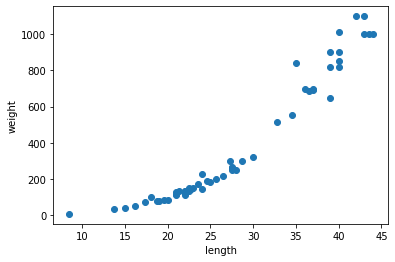

In [3]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

y축 '무게' 타깃 값

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
print(train_input.shape, test_input.shape)

(42,) (14,)



사이킷런의 모델은 입력 데이터(샘플)가 2차원배열이라 생각함
행방향으로 샘플이 들어서고 열방향으로 특성이 나열된 2차원 배열로 기대함

그럼므로 1차원으로 배열된 훈련데이터와 테스트데이터를 2차원 배열로 reshape을 이용하여 재배열




In [5]:
#길이 특성 하나이므로 열이 1인 2차원 배열로 재배열
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


sklearn의 모델 
분류: ~ Classifier
회귀: ~ Regressor

In [6]:
from sklearn.neighbors import KNeighborsRegressor

knr= KNeighborsRegressor()
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [7]:
knr.score(test_input, test_target)

0.9928094061010639

분류 모델의 테스트 score 점수는 정확도를 예측 (퍼센트)
회귀는 결정계수가 출력됨

**결정계수  R^2(R스퀘어): 회귀 모델에서 예측의 적합도를 0고 1사이의 값으로 계산하는 것** 
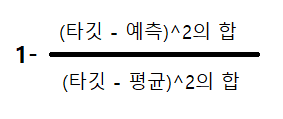
- 타깃의 평균 정도를 예측하는 수준이라면 R^2은 0에 가까워지고, 예측이 타깃에 아주 가까워지면 1에 가까운 값이 되지 않을까?

정답(타깃)값에서 얼마나 값이 떨어졌는지를 0~1사이의 수치로 나타낸 것을 이 결정계수로 볼 수 있습니다.

 
회귀모형내에서 독립변수(x축)로 설명할 수 있는 종속변수(y축)의 변동 비율 

결정계수가 0~1 1에 가까울수록 좋은 회귀모델임

In [8]:
from sklearn.metrics import mean_absolute_error
# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


타깃과 예측한 값 사이의 차이를 구해보면 어느정도 예측이 벗어났는지 가늠하기 좋다. 

사이킷런은 sklearn.metrics 패키지 아래 여러가지 측정 도구를 제공한다. 이중에서 **mean_absolute_error는 타깃과 예측의 절댓값 오차를 평균하여 반환**한다.


결과: 농어의 무게를 모델을 통해 예측값은 타깃값과 대략(평균적으로) 19g 오차가 난다.

**과대적합과 과소적합**

In [12]:
print("훈련 데이터의 점수: ")
print(knr.score(train_input, train_target))

훈련 데이터의 점수: 
0.9698823289099255


훈련 세트보다 테스트 세트의 점수가 높거나 두 점수 모두 낮은 경우: 모델이 훈련세트에 **과소적합(uderfitting)**
즉, 모델이 너무 단순해서 훈련 세트에 적절히 훈련되지 않은 경우이다.
훈련데이터가 전체데이터를 대표한다고 가정하기에 훈련세트를 잘 학습하는 것이 중요하다

**과대적합(overfitting)** 
훈련 세트에서 점수가 좋았으나 테스트 세트에서 점수가 굉장히 나쁘다면 과대적합
즉, 훈련 세트에서만 잘 맞는 모델이라 데스트 세트와 실전에 투입하여 새로운 샘플에 대한 예측을 만들때 잘 동작하지 않는다는 것

우리의 모델의 경우 훈련 세트보다 테스트 세트의 점수가 높으니 과소적합이다. 이 문제를 어떻게 해결할까?

모델을 조금 더 복잡하게 만들면 된다. 즉 훈련 세트에 더 잘 맞게 만들면 테스트 세트의 점수는 조금 낮아질 것이다. k-최근접 이웃 알고리즘으로 모델을 더 복잡하게 만드는 방법은 이웃의 개수 k를 줄이는 것

k-최근접 이웃에서 이웃개수를 줄이면 과대적합, 이웃 개수를 늘린다면 과소적합

k-최근접 이웃 알고리즘의 기본  k값은 5이다. 이를 3으로 낮춰보자.


In [13]:
knr.n_neighbors=3
knr.fit(train_input,train_target)
print('훈련데이터의 예측 점수: ',knr.score(train_input,train_target))
print('테스트 데이터의 예측 점수: ',knr.score(test_input,test_target))

훈련데이터의 예측 점수:  0.9804899950518966
테스트 데이터의 예측 점수:  0.974645996398761



회귀 분석
회귀는 임의의 수치를 예측하는 문제이다.
농어의 길이를 사용해 무게를 예측하는 k-최근접 이웃 회귀 모델을 만들었다.
분류와 동일하게 가장 먼저 가까운 k개의 이웃을 찾는다.
그 다음 이웃 샘플의 타깃값을 평균하여 예측하고자 하는 값으로 사용한다

사이킷런의 회귀모델은 점수를 R^2, 즉 결정계수 값을 반환한다.
이 값은 1에 가까울수록 좋다

훈련 세트의 점수와 테스트 세트의 점수 차이가 크면좋지 않다.
일반적으로 훈련 세트의 점수가 조금 더 높다

과대적합: 테스트 세트의 점수가 너무 낮은 현상, 모델이 훈련 세트에 과도하게 맞춰진 결과
=> 모델을 덜 복잡하게 만들어야 함

과소적합: 테스트 세트의 점수가 너무 높거나 두 점수 모두 낮을 경우 
=> 모델의 더 복잡하게 만들어야함